## Training part

In [1]:
#importing neccesary library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import specgram
from glob import glob
import librosa as lr
import librosa.display
import pickle

In [2]:
#train data
train = pd.DataFrame()
train=pd.read_csv('train.csv')
train.head(6)

,ID,Class
0,0,siren
1,1,street_music
2,2,drilling
3,3,siren
4,4,dog_bark
5,6,children_playing


In [3]:
#extracting features of each sound file
def parser(row):
    print(row.ID)
    try:
        filename='Train/'+str(row.ID)+'.wav'
        x,s=librosa.load(filename,res_type='kaiser_fast')
        stft = np.abs(librosa.stft(x))
        mfccs=np.mean(librosa.feature.mfcc(y=x,sr=s,n_mfcc=40).T,axis=0)
        chroma = np.mean(librosa.feature.chroma_stft(S=stft, sr=s, n_chroma=40).T,axis=0)
        mel = np.mean(librosa.feature.melspectrogram(x, sr=s, n_mels=40).T,axis=0)
        #features=np.reshape(np.vstack((mfccs,chroma,mel)),(40,3))
    except Exception as e:
        print('Error in ',filename)
        return None
    return pd.Series({'mfccs' : mfccs, 'chroma' : chroma , 'mel' : mel})


In [4]:
#creating new feature columns
train[['mfccs', 'chroma' , 'mel']] = train.apply(parser,axis=1)

0
0
1
2
3
4
6
10
11
12
15
17
18
19
20
22
24
26
27
32
33
35
36
37
38
40
42
43
44
45
46
47
48
49
50
52
54
56
57
59
60
61
63
65
66
67
68
71
72
74
76
77
78
79
80
81
82
83
84
87
88
90
91
92
93
97
99
100
101
103
104
105
113
114
116
117
118
119
120
121
123
125
128
130
131
132
134
135
136
137
138
139
140
142
146
148
149
152
153
159
160
162
163
164
165
167
168
170
171
172
174
175
176
178
179
182
184
185
186
187
188
189
192
193
196
197
200
202
208
211
212
213
214
215
216
217
218
219
221
222
223
224
226
227
228
229
230
232
233
235
236
239
242
245
246
247
248
249
250
251
252
253
255
258
260
261
263
264
268
269
270
271
272
275
276
277
278
280
282
285
286
288
295
299
300
301
303
304
305
306
307
308
309
310
311
312
313
314
315
316
317
318
319
322
323
324
326
327
328
329
330
331
332
333
334
335
336
337
338
339
342
343
346
347
348
349
350
351
352
353
354
355
356
357
358
359
360
361
363
364
365
366
367
368
369
370
371
372
374
376
377
378
380
381
382
383
385

C:\Users\Harini Pravin\Anaconda3\lib\site-packages\librosa\core\pitch.py:145: UserWarning: Trying to estimate tuning from empty frequency set.
  warnings.warn('Trying to estimate tuning from empty frequency set.')



386
388
391
392
394
395
396
397
400
401
402
406
407
408
410
411
412
413
414
417
418
419
423
425
426
427
428
429
430
435
436
437
438
440
442
444
445
446
447
449
450
452
453
454
455
456
457
459
461
462
464
467
468
470
471
472
473
474
475
477
479
480
482
484
485
486
488
489
491
493
495
497
498
500
501
506
507
509
511
512
513
515
516
519
520
522
523
524
525
527
528
532
533
534
537
538
540
542
543
544
547
549
551
554
555
556
557
559
560
561
562
564
565
566
567
568
569
570
571
572
573
575
576
578
579
580
583
584
585
586
587
589
590
593
594
597
598
599
600
603
604
605
606
607
610
611
612
613
614
615
619
620
621
622
623
624
629
630
631
633
635
636
639
642
643
645
646
648
651
652
654
655
656
657
658
659
660
661
662
663
664
665
666
669
670
671
673
676
677
679
683
684
685
686
687
688
689
690
691
692
693
694
695
697
698
699
702
703
704
705
709
710
712
713
714
716
717
719
720
721
722
724
726
727
728
729
730
732
733
734
735
737
738
739
740
742
744
746
748
749
750
751
752
753
754
755
757
758
760
761

3176
3177
3178
3179
3180
3182
3185
3186
3187
3188
3189
3190
3191
3192
3194
3195
3196
3197
3199
3200
3202
3205
3206
3207
3209
3211
3213
3214
3215
3216
3218
3220
3221
3223
3225
3226
3227
3229
3230
3231
3232
3233
3235
3236
3237
3238
3239
3240
3244
3246
3248
3250
3254
3257
3258
3259
3261
3262
3264
3266
3267
3268
3270
3271
3272
3273
3275
3276
3277
3278
3279
3281
3283
3285
3286
3288
3291
3292
3293
3294
3296
3297
3298
3299
3301
3302
3305
3306
3307
3308
3310
3316
3317
3318
3319
3320
3321
3322
3323
3324
3325
3328
3330
3331
3332
3333
3334
3336
3337
3338
3343
3344
3345
3347
3349
3350
3351
3352
3353
3354
3355
3357
3358
3360
3362
3363
3364
3365
3367
3369
3370
3371
3373
3375
3376
3379
3381
3383
3387
3388
3389
3390
3392
3394
3395
3397
3398
3399
3400
3401
3404
3406
3407
3409
3413
3415
3416
3417
3418
3419
3420
3422
3423
3425
3429
3432
3433
3434
3435
3436
3437
3439
3441
3442
3443
3444
3445
3446
3449
3451
3452
3453
3454
3455
3458
3459
3461
3462
3464
3465
3467
3469
3470
3471
3473
3474
3475
3477
3478
3480


5844
5847
5848
5850
5851
5852
5854
5856
5857
5858
5859
5862
5863
5864
5865
5867
5869
5870
5871
5874
5876
5877
5879
5881
5882
5886
5887
5888
5889
5890
5891
5892
5893
5897
5900
5901
5902
5903
5904
5906
5907
5908
5909
5912
5914
5915
5917
5918
5921
5922
5925
5926
5927
5928
5932
5933
5934
5936
5937
5940
5941
5942
5943
5944
5947
5948
5949
5950
5951
5952
5953
5954
5957
5960
5962
5963
5964
5966
5968
5976
5977
5980
5982
5983
5984
5985
5988
5989
5990
5992
5994
5995
5996
5997
5999
6001
6002
6003
6004
6005
6007
6009
6010
6012
6013
6014
6015
6016
6017
6019
6020
6021
6022
6023
6025
6026
6027
6029
6030
6031
6033
6034
6035
6040
6041
6046
6047
6049
6050
6051
6053
6054
6055
6056
6059
6061
6063
6066
6068
6070
6072
6074
6077
6079
6080
6081
6082
6083
6085
6086
6087
6088
6089
6091
6092
6094
6095
6096
6098
6099
6100
6101
6103
6104
6107
6108
6109
6115
6116
6117
6118
6119
6120
6121
6123
6129
6130
6131
6132
6133
6134
6136
6137
6138
6139
6140
6141
6142
6144
6145
6149
6151
6152
6153
6154
6156
6158
6159
6160
6161


8453
8457
8458
8459
8460
8462
8464
8465
8466
8467
8469
8470
8471
8472
8473
8474
8475
8476
8477
8479
8482
8483
8484
8485
8486
8491
8492
8493
8496
8498
8499
8500
8501
8502
8503
8507
8508
8510
8511
8512
8513
8514
8515
8518
8519
8520
8522
8523
8524
8526
8527
8531
8534
8535
8536
8538
8539
8540
8542
8543
8544
8546
8547
8552
8553
8558
8560
8562
8564
8565
8568
8569
8570
8571
8575
8578
8579
8580
8581
8582
8584
8586
8587
8588
8589
8590
8594
8595
8596
8597
8598
8599
8603
8604
8605
8607
8609
8610
8611
8612
8613
8614
8615
8616
8617
8618
8620
8621
8624
8625
8626
8627
8628
8630
8632
8635
8636
8637
8639
8640
8641
8643
8644
8646
8649
8650
8651
8653
8654
8656
8657
8658
8659
8660
8663
8664
8665
8666
8667
8670
8673
8675
8676
8677
8678
8679
8681
8682
8684
8685
8690
8691
8693
8694
8695
8699
8701
8703
8704
8705
8706
8707
8709
8710
8711
8712
8713
8714
8715
8716
8717
8720
8721
8722
8723
8724
8725
8726
8727
8728
8729


In [5]:
#printing first 10 rows
train.head(10)

,ID,Class,mfccs,chroma,mel
0,0,siren,"[-82.12358939071989, 139.50591598130987, -42.4...","[0.6709018367381375, 0.6958288501444836, 0.681...","[31.717414335108842, 13.555690256426441, 9.633..."
1,1,street_music,"[-15.744005405358058, 124.1199599305049, -29.4...","[0.5877005011847032, 0.5187510173121789, 0.441...","[14.145497421399151, 63.39686450228848, 98.405..."
2,2,drilling,"[-123.39365145003913, 15.181946313102896, -50....","[0.6218968445619084, 0.5932582429925514, 0.630...","[0.0667011760077899, 0.09752985124032008, 0.19..."
3,3,siren,"[-213.27878814908152, 89.32358896182456, -55.2...","[0.09336093313982503, 0.05026213858731795, 0.0...","[0.20019475940852363, 0.11392624169384248, 0.0..."
4,4,dog_bark,"[-237.92647882472895, 135.90246127730546, 39.2...","[0.6695262603263147, 0.68061553899303, 0.68160...","[32.20411169640272, 35.485136125532215, 31.190..."
5,6,children_playing,"[-250.35704278618198, 128.01181557087781, -47....","[0.609558267345955, 0.5699240199247898, 0.5654...","[1.8058256961740438, 1.287597202396624, 0.3255..."
6,10,street_music,"[-203.97553041599923, 83.95814057767474, -66.7...","[0.3196822701404722, 0.3480482018585272, 0.420...","[0.05998233964188296, 0.032810456026657414, 0...."
7,11,drilling,"[-55.40055461612478, 22.767318943295965, -46.0...","[0.41023569880588057, 0.4593871512084195, 0.49...","[0.04055573948768239, 0.08372043525631953, 0.5..."
8,12,gun_shot,"[-110.22915733719984, 91.25898699199308, -137....","[0.6069863687093838, 0.6252225634446887, 0.642...","[2.4503560428505082, 1.1618003241201669, 0.810..."
9,15,dog_bark,"[-337.7600192890491, 140.77517821184472, -15.5...","[0.5454278577188605, 0.5564164937780018, 0.536...","[0.1657370176835346, 0.17731001732116214, 0.12..."


In [6]:
import seaborn as sns
sns.set(style='whitegrid')
plt.style.use('seaborn-darkgrid')

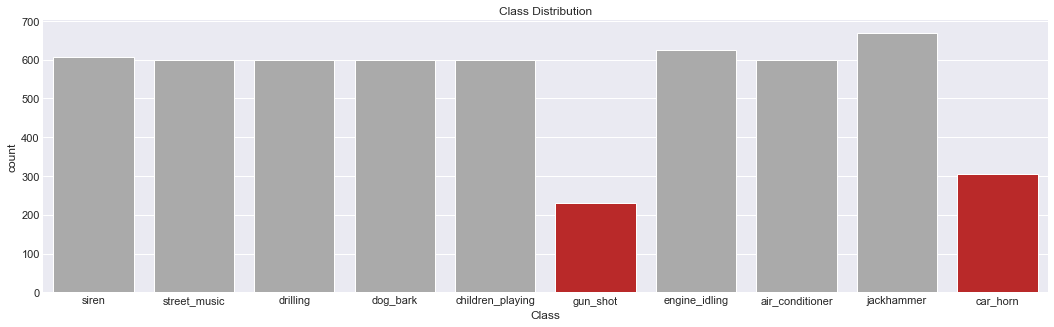

In [7]:
Class = train.Class.value_counts()
colours = ["#aaaaaa", "#aaaaaa", "#aaaaaa","#aaaaaa","#aaaaaa","#d11111","#aaaaaa","#aaaaaa","#aaaaaa","#d11111"]
f, ax = plt.subplots(figsize=(18,5)) 
ax = sns.countplot(x='Class', data=train, palette=colours)
plt.title('Class Distribution');

In [8]:
labels = train.Class.unique()

In [9]:
#!pip install np_utils

In [10]:
#preprocessing statements
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
#keras import statements
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.optimizers import Adam
from keras.utils import np_utils

C:\Users\Harini Pravin\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [11]:
#features and label values
X=np.array(train.iloc[:,2:5].values.tolist())
Y=np.array(train.iloc[:,1].values.tolist())

In [12]:
# original shape of features-- 3 dimensional array
X.shape

(5435, 3, 40)

In [13]:
#modified shape of features -- 2 dimensional array
X_2d=np.reshape(X,(X.shape[0],X.shape[1]*X.shape[2]))
X_2d.shape

(5435, 120)

In [14]:
# label encoding target values -- 10 labels
le = LabelEncoder()
yy=np_utils.to_categorical(le.fit_transform(Y))

In [15]:
#saving encoder model
filename = 'encoder.pkl'
pickle.dump(le, open(filename, 'wb'))

In [16]:
yy.shape

(5435, 10)

In [17]:
#splitting train and validation set
aTrain,aTest,bTrain,bTest=train_test_split(X_2d,yy,test_size=0.2)

num_labels = yy.shape[1]
filter_size = 2

In [18]:
bTest.shape

(1087, 10)

In [80]:
# build model
model = Sequential()

In [81]:
#building the model
model.add(Dense(256, input_dim=120))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(num_labels))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 256)               30976     
_________________________________________________________________
activation_5 (Activation)    (None, 256)               0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 256)               65792     
_________________________________________________________________
activation_6 (Activation)    (None, 256)               0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 256)               65792     
__________

In [82]:
#training model
history = model.fit(aTrain, bTrain, batch_size=32, epochs=500, validation_data=(aTest, bTest))

Train on 4348 samples, validate on 1087 samples
Epoch 1/500
4348/4348 [==============================] - 3s 596us/step - loss: 12.5024 - acc: 0.1467 - val_loss: 6.6152 - val_acc: 0.2953
Epoch 2/500
4348/4348 [==============================] - 1s 258us/step - loss: 7.7969 - acc: 0.2132 - val_loss: 1.9242 - val_acc: 0.4020
Epoch 3/500
4348/4348 [==============================] - 1s 289us/step - loss: 2.8988 - acc: 0.2537 - val_loss: 1.9268 - val_acc: 0.4296
Epoch 4/500
4348/4348 [==============================] - 1s 295us/step - loss: 2.2237 - acc: 0.3013 - val_loss: 1.8318 - val_acc: 0.4977
Epoch 5/500
4348/4348 [==============================] - 1s 271us/step - loss: 2.0445 - acc: 0.3450 - val_loss: 1.7061 - val_acc: 0.5419
Epoch 6/500
4348/4348 [==============================] - 1s 290us/step - loss: 1.8917 - acc: 0.3852 - val_loss: 1.5763 - val_acc: 0.5667
Epoch 7/500
4348/4348 [==============================] - 2s 349us/step - loss: 1.7786 - acc: 0.4209 - val_loss: 1.4954 - val_acc:

4348/4348 [==============================] - 1s 253us/step - loss: 0.6212 - acc: 0.7999 - val_loss: 0.4470 - val_acc: 0.8583
Epoch 61/500
4348/4348 [==============================] - 1s 247us/step - loss: 0.6540 - acc: 0.7958 - val_loss: 0.4436 - val_acc: 0.8620
Epoch 62/500
4348/4348 [==============================] - 1s 255us/step - loss: 0.6800 - acc: 0.7953 - val_loss: 0.4388 - val_acc: 0.8675
Epoch 63/500
4348/4348 [==============================] - 1s 244us/step - loss: 0.6098 - acc: 0.8114 - val_loss: 0.4202 - val_acc: 0.8675
Epoch 64/500
4348/4348 [==============================] - 1s 248us/step - loss: 0.6240 - acc: 0.8084 - val_loss: 0.4322 - val_acc: 0.8629
Epoch 65/500
4348/4348 [==============================] - 1s 271us/step - loss: 0.6335 - acc: 0.8057 - val_loss: 0.4214 - val_acc: 0.8648
Epoch 66/500
4348/4348 [==============================] - 1s 255us/step - loss: 0.5813 - acc: 0.8107 - val_loss: 0.4307 - val_acc: 0.8694
Epoch 67/500
4348/4348 [=======================

4348/4348 [==============================] - 1s 250us/step - loss: 0.4758 - acc: 0.8549 - val_loss: 0.3493 - val_acc: 0.8988
Epoch 120/500
4348/4348 [==============================] - 1s 245us/step - loss: 0.4794 - acc: 0.8567 - val_loss: 0.3841 - val_acc: 0.8868
Epoch 121/500
4348/4348 [==============================] - 1s 254us/step - loss: 0.4939 - acc: 0.8503 - val_loss: 0.3692 - val_acc: 0.8795
Epoch 122/500
4348/4348 [==============================] - 1s 284us/step - loss: 0.4755 - acc: 0.8576 - val_loss: 0.3451 - val_acc: 0.8933
Epoch 123/500
4348/4348 [==============================] - 1s 256us/step - loss: 0.4744 - acc: 0.8558 - val_loss: 0.3511 - val_acc: 0.8905
Epoch 124/500
4348/4348 [==============================] - 1s 246us/step - loss: 0.4477 - acc: 0.8588 - val_loss: 0.3764 - val_acc: 0.8914
Epoch 125/500
4348/4348 [==============================] - 1s 284us/step - loss: 0.4518 - acc: 0.8576 - val_loss: 0.3778 - val_acc: 0.8914
Epoch 126/500
4348/4348 [================

4348/4348 [==============================] - 1s 263us/step - loss: 0.4375 - acc: 0.8664 - val_loss: 0.3798 - val_acc: 0.8868
Epoch 179/500
4348/4348 [==============================] - 1s 280us/step - loss: 0.4465 - acc: 0.8682 - val_loss: 0.3464 - val_acc: 0.8979
Epoch 180/500
4348/4348 [==============================] - 1s 278us/step - loss: 0.4223 - acc: 0.8659 - val_loss: 0.3817 - val_acc: 0.8988
Epoch 181/500
4348/4348 [==============================] - 1s 267us/step - loss: 0.3811 - acc: 0.8806 - val_loss: 0.3864 - val_acc: 0.8887
Epoch 182/500
4348/4348 [==============================] - 1s 302us/step - loss: 0.4384 - acc: 0.8694 - val_loss: 0.3792 - val_acc: 0.8979
Epoch 183/500
4348/4348 [==============================] - 1s 287us/step - loss: 0.4167 - acc: 0.8749 - val_loss: 0.3661 - val_acc: 0.8951
Epoch 184/500
4348/4348 [==============================] - 1s 267us/step - loss: 0.3926 - acc: 0.8751 - val_loss: 0.3540 - val_acc: 0.9043
Epoch 185/500
4348/4348 [================

4348/4348 [==============================] - 1s 258us/step - loss: 0.4040 - acc: 0.8882 - val_loss: 0.3484 - val_acc: 0.9089
Epoch 238/500
4348/4348 [==============================] - 1s 262us/step - loss: 0.4201 - acc: 0.8864 - val_loss: 0.3689 - val_acc: 0.8979
Epoch 239/500
4348/4348 [==============================] - 1s 252us/step - loss: 0.4007 - acc: 0.8836 - val_loss: 0.3692 - val_acc: 0.8979
Epoch 240/500
4348/4348 [==============================] - 1s 256us/step - loss: 0.3716 - acc: 0.8855 - val_loss: 0.3822 - val_acc: 0.8887
Epoch 241/500
4348/4348 [==============================] - 1s 255us/step - loss: 0.4048 - acc: 0.8859 - val_loss: 0.3457 - val_acc: 0.9071
Epoch 242/500
4348/4348 [==============================] - 1s 273us/step - loss: 0.3806 - acc: 0.8871 - val_loss: 0.3586 - val_acc: 0.9016
Epoch 243/500
4348/4348 [==============================] - 1s 268us/step - loss: 0.3716 - acc: 0.8887 - val_loss: 0.3405 - val_acc: 0.9025
Epoch 244/500
4348/4348 [================

4348/4348 [==============================] - 1s 261us/step - loss: 0.3566 - acc: 0.8940 - val_loss: 0.3460 - val_acc: 0.9016
Epoch 297/500
4348/4348 [==============================] - 1s 270us/step - loss: 0.3518 - acc: 0.8917 - val_loss: 0.3412 - val_acc: 0.9043
Epoch 298/500
4348/4348 [==============================] - 1s 248us/step - loss: 0.3298 - acc: 0.8960 - val_loss: 0.3328 - val_acc: 0.9144
Epoch 299/500
4348/4348 [==============================] - 1s 259us/step - loss: 0.3563 - acc: 0.8931 - val_loss: 0.3593 - val_acc: 0.8960
Epoch 300/500
4348/4348 [==============================] - 1s 247us/step - loss: 0.3819 - acc: 0.8887 - val_loss: 0.3387 - val_acc: 0.9098
Epoch 301/500
4348/4348 [==============================] - 1s 263us/step - loss: 0.3532 - acc: 0.8963 - val_loss: 0.3702 - val_acc: 0.8960
Epoch 302/500
4348/4348 [==============================] - 1s 247us/step - loss: 0.3569 - acc: 0.8901 - val_loss: 0.3564 - val_acc: 0.9016
Epoch 303/500
4348/4348 [================

Epoch 355/500
4348/4348 [==============================] - 1s 257us/step - loss: 0.3608 - acc: 0.8983 - val_loss: 0.3350 - val_acc: 0.9025
Epoch 356/500
4348/4348 [==============================] - 1s 250us/step - loss: 0.3655 - acc: 0.8898 - val_loss: 0.3219 - val_acc: 0.9080
Epoch 357/500
4348/4348 [==============================] - 1s 249us/step - loss: 0.3457 - acc: 0.8974 - val_loss: 0.3248 - val_acc: 0.9135
Epoch 358/500
4348/4348 [==============================] - 1s 250us/step - loss: 0.3071 - acc: 0.9119 - val_loss: 0.3236 - val_acc: 0.9052
Epoch 359/500
4348/4348 [==============================] - 1s 260us/step - loss: 0.3248 - acc: 0.9069 - val_loss: 0.3368 - val_acc: 0.9098
Epoch 360/500
4348/4348 [==============================] - 1s 275us/step - loss: 0.3388 - acc: 0.9041 - val_loss: 0.3461 - val_acc: 0.9154
Epoch 361/500
4348/4348 [==============================] - 1s 290us/step - loss: 0.3588 - acc: 0.8993 - val_loss: 0.3171 - val_acc: 0.9108
Epoch 362/500
4348/4348 [==

Epoch 414/500
4348/4348 [==============================] - 1s 291us/step - loss: 0.3564 - acc: 0.8995 - val_loss: 0.3547 - val_acc: 0.9080
Epoch 415/500
4348/4348 [==============================] - 1s 250us/step - loss: 0.3261 - acc: 0.9080 - val_loss: 0.3323 - val_acc: 0.9089
Epoch 416/500
4348/4348 [==============================] - 1s 277us/step - loss: 0.3370 - acc: 0.9016 - val_loss: 0.3537 - val_acc: 0.9154
Epoch 417/500
4348/4348 [==============================] - 1s 259us/step - loss: 0.3218 - acc: 0.9066 - val_loss: 0.3375 - val_acc: 0.9034
Epoch 418/500
4348/4348 [==============================] - 1s 254us/step - loss: 0.2919 - acc: 0.9184 - val_loss: 0.3035 - val_acc: 0.9181
Epoch 419/500
4348/4348 [==============================] - 1s 253us/step - loss: 0.3020 - acc: 0.9062 - val_loss: 0.3356 - val_acc: 0.9098
Epoch 420/500
4348/4348 [==============================] - 1s 248us/step - loss: 0.3232 - acc: 0.9075 - val_loss: 0.3459 - val_acc: 0.9098
Epoch 421/500
4348/4348 [==

Epoch 473/500
4348/4348 [==============================] - 1s 252us/step - loss: 0.3424 - acc: 0.9075 - val_loss: 0.3817 - val_acc: 0.9025
Epoch 474/500
4348/4348 [==============================] - 1s 250us/step - loss: 0.3410 - acc: 0.9032 - val_loss: 0.3773 - val_acc: 0.9089
Epoch 475/500
4348/4348 [==============================] - 1s 259us/step - loss: 0.3210 - acc: 0.9078 - val_loss: 0.3847 - val_acc: 0.9144
Epoch 476/500
4348/4348 [==============================] - 1s 256us/step - loss: 0.3101 - acc: 0.9096 - val_loss: 0.3533 - val_acc: 0.9181
Epoch 477/500
4348/4348 [==============================] - 1s 253us/step - loss: 0.3222 - acc: 0.9133 - val_loss: 0.3616 - val_acc: 0.9089
Epoch 478/500
4348/4348 [==============================] - 1s 254us/step - loss: 0.3455 - acc: 0.9034 - val_loss: 0.3525 - val_acc: 0.9144
Epoch 479/500
4348/4348 [==============================] - 1s 250us/step - loss: 0.3170 - acc: 0.9101 - val_loss: 0.4007 - val_acc: 0.9006
Epoch 480/500
4348/4348 [==

In [83]:
# list all data in history
import matplotlib.pyplot as plt
print(history.history.keys())

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


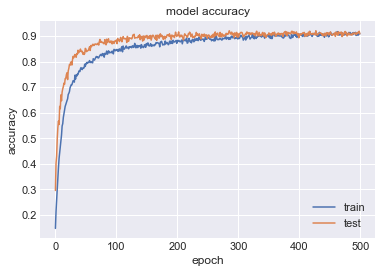

In [84]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()

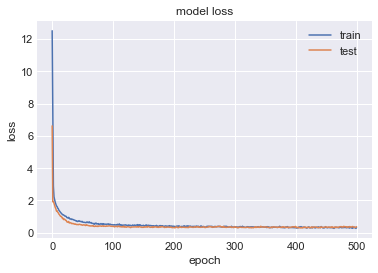

In [85]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [25]:
def plot_confusion_matrix(cm, labels ,title= 'Confusion Matrix' , cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(labels))
    plt.xticks(tick_marks, labels,rotation=45)
    plt.yticks(tick_marks,labels)
    plt.tight_layout()
    plt.ylabel('True labels')
    plt.xlabel('Predicted labels')

Confusion matrix
[[111   0   2   0   0   0   0   1   0   0]
 [  1  61   0   0   0   1   0   1   0   4]
 [  1   0 107   5   1   0   1   0   0   5]
 [  5   2  11  88   1   0   2   0   2   6]
 [  0   0   2   0 114   0   0   0   0   3]
 [  4   0   1   0   0 119   0   0   0   1]
 [  0   0   0   2   1   0  39   0   0   0]
 [  0   0   0   0   1   0   0 136   0   0]
 [  0   0   3   4   1   0   0   0 110   2]
 [  3   1  22   1   1   1   0   2   1  93]]


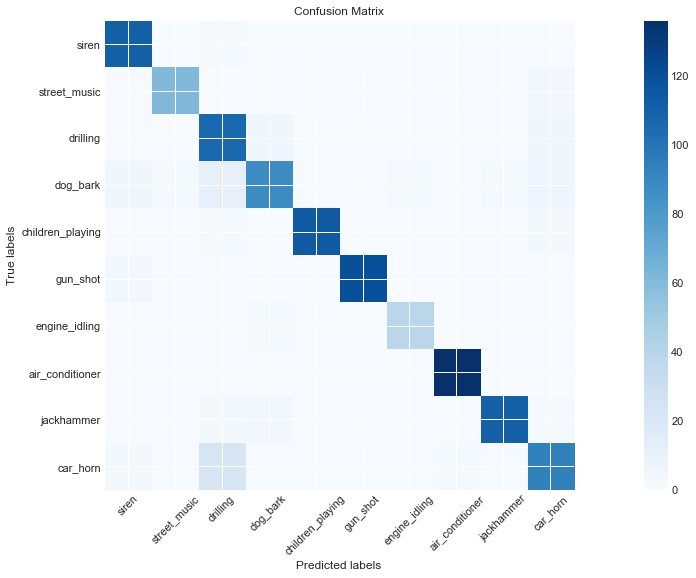

In [26]:
from sklearn.metrics import confusion_matrix

pred = model.predict(aTest)
pred = np.argmax(pred,axis=1)
bTest2 = np.argmax(bTest,axis=1)

cm= confusion_matrix(bTest2,pred)
np.set_printoptions(precision=2)
print('Confusion matrix')
print(cm)
plt.figure(figsize=(20,8))
plot_confusion_matrix(cm, labels)

##  Testing part

In [93]:
#audio path of the file to be tested
destination=r'C:\Users\Harini Pravin\Downloads\urban-sound-classification\Test\5.wav'

In [94]:
#feature extraction of the sound to be predicted
def preprocess(file):
    x,s=librosa.load(file,res_type='kaiser_fast')
    stft = np.abs(librosa.stft(x))
    mfccs=np.mean(librosa.feature.mfcc(y=x,sr=s,n_mfcc=40).T,axis=0)
    chroma = np.mean(librosa.feature.chroma_stft(S=stft, sr=s, n_chroma=40).T,axis=0)
    mel = np.mean(librosa.feature.melspectrogram(x, sr=s, n_mels=40).T,axis=0)
    Xtest=np.vstack((mfccs,chroma,mel)).T
    X_2dt=np.reshape(Xtest,(1,Xtest.shape[0]*Xtest.shape[1]))
    return X_2dt

In [95]:
X_final = preprocess(destination)

In [96]:
X_final.shape

(1, 120)

In [97]:
from keras.models import load_model
model.save('my_model.h5')

In [98]:
#saving the final model as pickle object
filename = 'finalized_model.pkl'
pickle.dump(model, open(filename, 'wb'))

In [99]:
#predicting the sound with the trained model
urban = pickle.load(open('finalized_model.pkl','rb'))
label_en = pickle.load(open('encoder.pkl', 'rb'))
print(label_en.inverse_transform(urban.predict_classes(X_final)))

['drilling']
